In [211]:
import numpy as np
import matplotlib.pyplot as plt

n=100
m=110
M = np.random.rand(m, n)

1. Compute the SVD of the matrix M

In [212]:
U, s, Vt = np.linalg.svd(M)

2. Plot the singular values of M

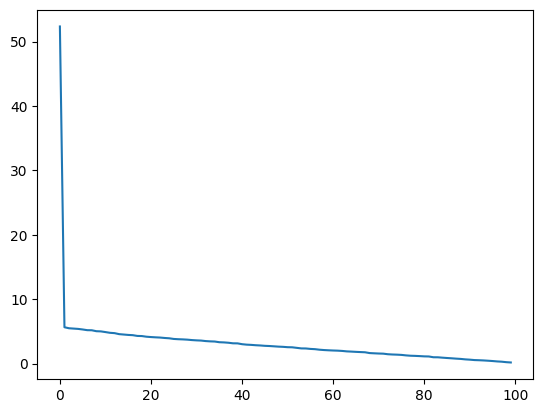

In [204]:
plt.plot(s)

3. Check that you can reconstruct M from the decomposition

In [213]:
USVt = U[:,:n] @ np.diagflat(s) @ Vt
np.allclose(M, USVt)

True

4. Construct a low rank approximation by truncating singular values that are smaller than 10^-4

In [216]:
r = np.count_nonzero(s >= 10**-2)
M_rank_approx = U[:,:r] @ np.diagflat(s[:r]) @ Vt[:r,:]
np.linalg.norm(M_rank_approx-M)

8.159276908814268e-14

In [217]:
r # (No truncation)

100

5. Plot the error caused by truncation against the singular value threshold

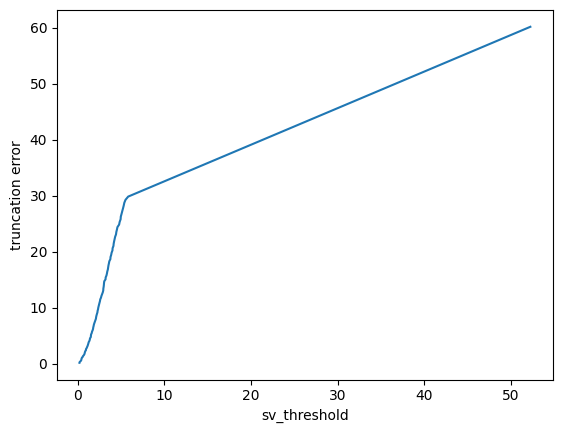

In [218]:
truncation_errors = np.sqrt(np.cumsum(s[::-1]**2))
plt.ylabel("truncation error")
plt.xlabel("sv_threshold")
plt.plot(s[::-1], truncation_errors)

6. Plot the error caused by the truncation against the parameter reduction as a percentage

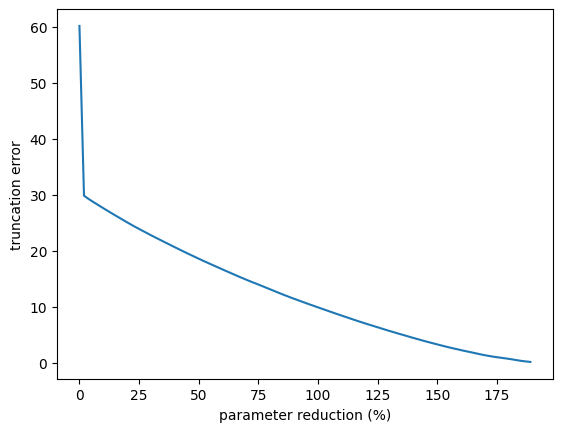

In [219]:
ranks = np.arange(0, min(n,m))
plt.xlabel("parameter reduction (%)")
plt.ylabel("truncation error")
plt.plot((n+m)*ranks[::-1]/(n*m) * 100, truncation_errors)

7. Repeat the above for the matrix M2

In [220]:
n=100 # m => n
m=110
M2 = np.linalg.qr(np.random.rand(m, n))[0][:,:n] @ np.diagflat(np.exp(-0.1*np.arange(n)) * (np.arange(n) > 70)) @ np.linalg.qr(np.random.rand(n, m))[0]

In [222]:
U, s, Vt = np.linalg.svd(M2)

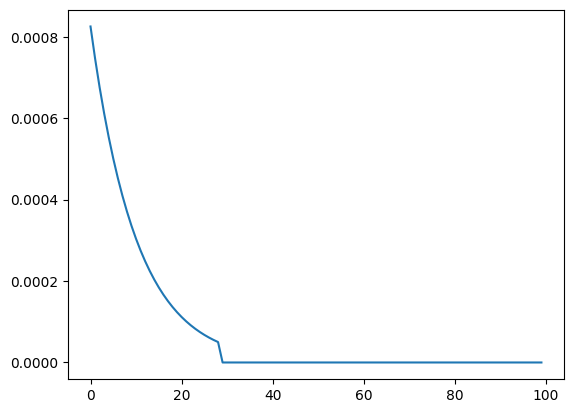

In [223]:
plt.plot(s)

In [224]:
USVt = U[:,:n] @ np.diagflat(s) @ Vt
np.allclose(M2, USVt)

True

In [225]:
r = np.count_nonzero(s >= 10**-4)
M2_rank_approx = U[:,:r] @ np.diagflat(s[:r]) @ Vt[:r,:]
np.linalg.norm(M2_rank_approx-M2)

0.00018638584890688607

In [226]:
r

22

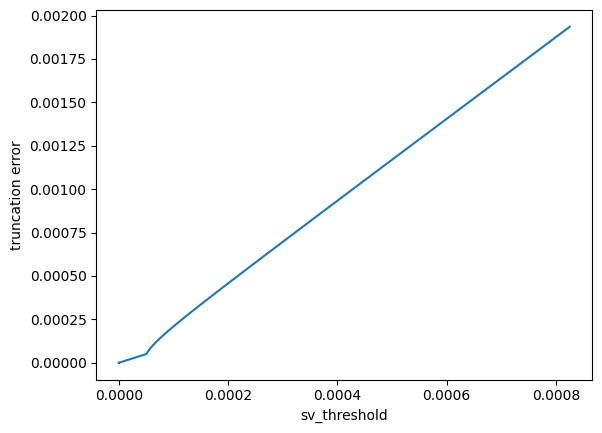

In [227]:
truncation_errors = np.sqrt(np.cumsum(s[::-1]**2))
plt.ylabel("truncation error")
plt.xlabel("sv_threshold")
plt.plot(s[::-1], truncation_errors)

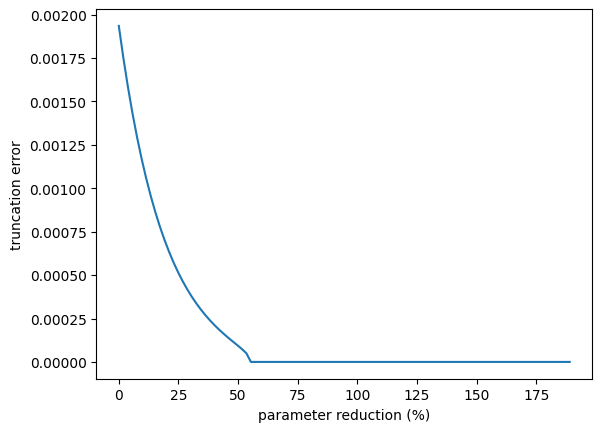

In [228]:
ranks = np.arange(0, min(n, m))
plt.xlabel("parameter reduction (%)")
plt.ylabel("truncation error")
plt.plot(((n+m)*ranks[::-1]/(n*m) * 100), truncation_errors)